In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os

In [2]:
telecom=pd.read_csv("training_data.csv")
telecom.head(10)

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,Los Angeles,Male,No,2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
1,Los Angeles,Female,No,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
2,Los Angeles,Female,No,8,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
3,Los Angeles,Female,No,28,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
4,Los Angeles,Male,No,49,Yes,Fiber optic,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes
5,Los Angeles,Female,No,10,Yes,DSL,No,No,Month-to-month,Credit card (automatic),55.20,528.35,Yes
6,Los Angeles,Male,Yes,1,No,DSL,No,Yes,Month-to-month,Electronic check,39.65,39.65,Yes
7,Los Angeles,Male,No,1,Yes,No,No internet service,No internet service,Month-to-month,Mailed check,20.15,20.15,Yes
8,Los Angeles,Male,No,47,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.35,4749.15,Yes
9,Los Angeles,Male,No,1,No,DSL,No,No,Month-to-month,Electronic check,30.20,30.2,Yes


In [3]:
telecom.shape

(7043, 13)

In [4]:
telecom.shape
telecom.drop("City", axis=1, inplace=True)
telecom.tail(10)


,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7033,Female,No,2,Yes,No,No internet service,No internet service,Month-to-month,Mailed check,20.05,39.25,No
7034,Male,Yes,55,Yes,DSL,No,No,One year,Credit card (automatic),60.00,3316.1,No
7035,Male,No,38,Yes,Fiber optic,No,No,Month-to-month,Credit card (automatic),69.50,2625.25,No
7036,Male,No,19,Yes,Fiber optic,Yes,No,Month-to-month,Bank transfer (automatic),78.70,1495.1,No
7037,Female,No,12,No,DSL,Yes,Yes,One year,Electronic check,60.65,743.3,No
7038,Female,No,72,Yes,No,No internet service,No internet service,Two year,Bank transfer (automatic),21.15,1419.4,No
7039,Male,No,24,Yes,DSL,Yes,Yes,One year,Mailed check,84.80,1990.5,No
7040,Female,No,72,Yes,Fiber optic,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,No
7041,Female,No,11,No,DSL,No,No,Month-to-month,Electronic check,29.60,346.45,No
7042,Male,No,66,Yes,Fiber optic,Yes,Yes,Two year,Bank transfer (automatic),105.65,6844.5,No


In [5]:
for col in telecom.columns:
    print(f"{col}: {telecom[col].nunique()} unique values")


Gender: 2 unique values
Senior_Citizen: 2 unique values
Tenure_Months: 73 unique values
Phone_Service: 2 unique values
Internet_Service: 3 unique values
Streaming TV: 3 unique values
Streaming Movies: 3 unique values
Contract: 3 unique values
Payment Method: 4 unique values
Monthly Charges: 1585 unique values
Total_Charges: 6531 unique values
Churn: 2 unique values


In [6]:
for col in telecom.columns:
    if telecom[col].dtype == 'object':
        telecom[col], _ = pd.factorize(telecom[col])

telecom.head(10)

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,0,0,2,0,0,0,0,0,0,53.85,0,0
1,1,0,2,0,1,0,0,0,1,70.70,1,0
2,1,0,8,0,1,1,1,0,1,99.65,2,0
3,1,0,28,0,1,1,1,0,1,104.80,3,0
4,0,0,49,0,1,1,1,0,2,103.70,4,0
5,1,0,10,0,0,0,0,0,3,55.20,5,0
6,0,1,1,1,0,0,1,0,1,39.65,6,0
7,0,0,1,0,2,2,2,0,0,20.15,7,0
8,0,0,47,0,1,1,1,0,1,99.35,8,0
9,0,0,1,1,0,0,0,0,1,30.20,9,0


In [7]:
telecom.tail()

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7038,1,0,72,0,2,2,2,1,2,21.15,6526,1
7039,0,0,24,0,0,1,1,2,0,84.80,6527,1
7040,1,0,72,0,1,1,1,2,3,103.20,6528,1
7041,1,0,11,1,0,0,0,0,1,29.60,6529,1
7042,0,0,66,0,1,1,1,1,2,105.65,6530,1


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix, f1_score, roc_auc_score

In [9]:
X = telecom.drop('Churn',axis=1)
y = telecom['Churn']
#Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [10]:
# devide the dataset into train and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [11]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1234)

X_sm, y_sm = sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7043, 11)
Shape of X after SMOTE: (8278, 11)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn, dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sm = sc.fit_transform(X_sm)
X_test = sc.transform(x_test)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn.svm import LinearSVC
#svm =LinearSVC()
#from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [14]:
classifiers = [[XGBClassifier(eval_metric='error'),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SVC(),'SVC'],[MLPClassifier(), 'Neural Network'],
    [DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

In [15]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 : ", f1_score(y_test, y_pred) *  100)
    print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)
    print('\n')

XGB Classifier
Confusion Matrix:
[[ 360   14]
 [  29 1006]]
Accuracy :  96.94819020581973
Recall :  97.19806763285024
Precision :  98.62745098039215
F1 :  97.90754257907543
ROC AUC :  96.72737606241442


Random Forest
Confusion Matrix:
[[ 361   13]
 [  31 1004]]
Accuracy :  96.87721788502483
Recall :  97.0048309178744
Precision :  98.72173058013766
F1 :  97.85575048732943
ROC AUC :  96.7644475444987


K-Nearest Neighbours
Confusion Matrix:
[[346  28]
 [ 79 956]]
Accuracy :  92.40596167494677
Recall :  92.3671497584541
Precision :  97.15447154471545
F1 :  94.70034670629023
ROC AUC :  92.44025937120567


SVC
Confusion Matrix:
[[365   9]
 [ 64 971]]
Accuracy :  94.81902058197304
Recall :  93.81642512077295
Precision :  99.08163265306122
F1 :  96.37717121588089
ROC AUC :  95.70500400423676




C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network
Confusion Matrix:
[[366   8]
 [ 39 996]]
Accuracy :  96.66430092264017
Recall :  96.23188405797102
Precision :  99.20318725099602
F1 :  97.69494850416872
ROC AUC :  97.04642331240797


Decision Tree Classifier
Confusion Matrix:
[[ 353   21]
 [  28 1007]]
Accuracy :  96.52235628105039
Recall :  97.29468599033815
Precision :  97.95719844357976
F1 :  97.62481822588462
ROC AUC :  95.83985636415304


Logistic Regression
Confusion Matrix:
[[363  11]
 [ 54 981]]
Accuracy :  95.38679914833214
Recall :  94.78260869565217
Precision :  98.89112903225806
F1 :  96.7932905772077
ROC AUC :  95.92071611253196




Accuracy: 0.9694819020581973
Confusion Matrix:
 [[ 360   14]
 [  29 1006]]


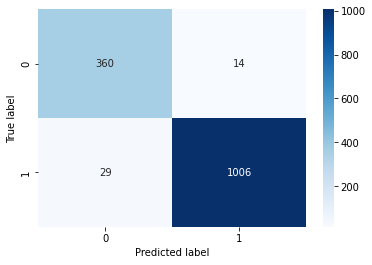

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(telecom.drop(['Churn'], axis=1), telecom['Churn'], test_size=0.2, random_state=123)

# Build the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1, random_state=1234)
model.fit(X_sm, y_sm)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
# XGBoost clasifier
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic')


In [31]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [32]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [33]:
grid.fit(X_sm, y_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.969 total time=   1.3s
[CV 2/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.960 total time=   1.5s
[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.981 total time=   1.3s
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.983 total time=   1.3s
[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.977 total time=   1.2s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.975 total time=   0.6s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.966 total time=   0.5s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.978 total time=   0.4s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.981 total time=   0.4s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.974 total time=   0.4s

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [34]:
grid.best_params_


{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}

In [35]:
xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(X_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [36]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(X_test, y_test)*100)

testing accuracy is :  97.30305180979418


In [37]:
categorical_cols= telecom.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')



The dataset contains 0 categorical columns


In [38]:
##categorical_cols.describe()

In [39]:
for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = SVC(C=1, gamma=2)
clf3 = DecisionTreeClassifier(max_depth=5)
clf4 = RandomForestClassifier()
clf5 = MLPClassifier(alpha=1, max_iter=1000)

stacking_clf = StackingClassifier(estimators=[('knn', clf1),
                               ('svm_rbf', clf2),
                               ('dt', clf3),
                               ('rf', clf4),
                               ('mlp', clf5)],
                   final_estimator=LogisticRegression(),
                   stack_method='auto')
